In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
df = pd.read_csv("ML_dataset_uber.csv")

In [7]:
print("----- INFORMATION OF DATASET -----")
print('Shape of Dataset (rows x columns):', df.shape)
print('Columns Name:', df.columns.tolist())
print('Total elements in dataset:', df.size)
print('\nDatatype of attributes:\n', df.dtypes)
print('\nFirst 5 rows:\n', df.head().T)
print('\nLast 5 rows:\n', df.tail().T)
print('\nAny 5 random rows:\n', df.sample(5).T)

----- INFORMATION OF DATASET -----
Shape of Dataset (rows x columns): (200000, 9)
Columns Name: ['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
Total elements in dataset: 1800000

Datatype of attributes:
 Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

First 5 rows:
                                          0                        1  \
Unnamed: 0                        24238194                 27835199   
key                                52:06.0                  04:56.0   
fare_amount                            7.5                      7.7   
pickup_datetime    2015-05-07 19:52:06 UTC  2009-07-17 20:04:56 UTC   
pickup_longitude                -73.999817

In [9]:
print("\n----- STATISTICAL INFORMATION -----")
print(df.describe(), "\n")



----- STATISTICAL INFORMATION -----
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787         7.720539   
min    1.000000e+00     -52.000000      -1340.648410       -74.015515   
25%    1.382535e+07       6.000000        -73.992065        40.734796   
50%    2.774550e+07       8.500000        -73.981823        40.752592   
75%    4.155530e+07      12.500000        -73.967153        40.767158   
max    5.542357e+07     499.000000         57.418457      1644.421482   

       dropoff_longitude  dropoff_latitude  passenger_count  
count      199999.000000     199999.000000    200000.000000  
mean          -72.525292         39.923890         1.684535  
std            13.117408          6.794829         1.385997  
min         -3356.666300       -881.985513         0.0000

In [13]:
print(" MISSING VALUES")
print(df.isnull().sum(), "\n")

 MISSING VALUES
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64 



In [15]:
df.drop(['Unnamed: 0', 'key'], axis=1, inplace=True)

In [17]:
df.dropna(inplace=True)

In [19]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')


In [20]:
df = df.dropna(subset=['pickup_datetime'])


In [23]:
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df['weekday'] = df['pickup_datetime'].dt.weekday

In [25]:
df.drop('pickup_datetime', axis=1, inplace=True)


In [27]:
df = df[(df['fare_amount'] > 0) & (df['passenger_count'] > 0) & (df['passenger_count'] < 8)]


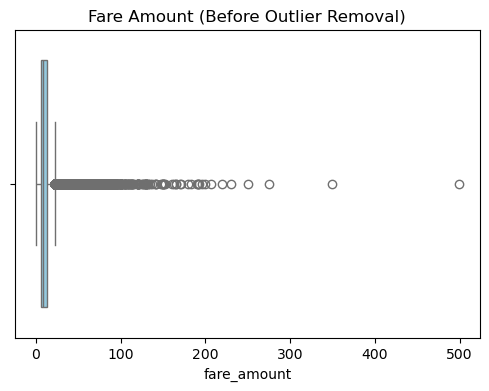

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['fare_amount'], color='skyblue')
plt.title("Fare Amount (Before Outlier Removal)")
plt.show()

In [33]:
q_low = df["fare_amount"].quantile(0.01)
q_hi  = df["fare_amount"].quantile(0.99)
df = df[(df["fare_amount"] >= q_low) & (df["fare_amount"] <= q_hi)]

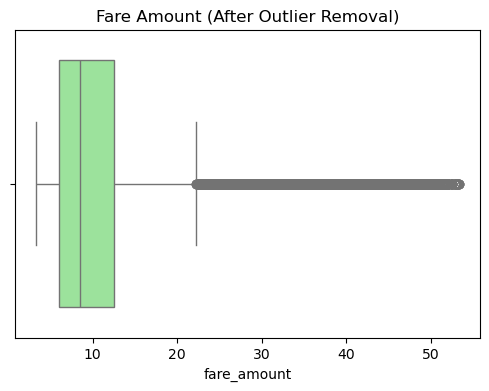

In [35]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['fare_amount'], color='lightgreen')
plt.title("Fare Amount (After Outlier Removal)")
plt.show()

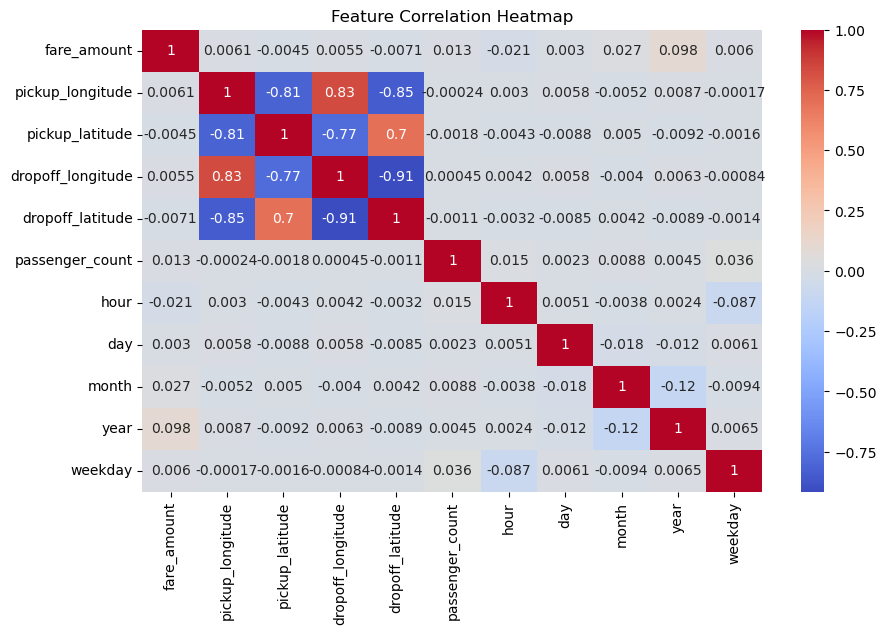

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [39]:
X = df.drop("fare_amount", axis=1)
y = df["fare_amount"]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [45]:
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
lr_mape = np.mean(np.abs((y_test - lr_pred) / y_test)) * 100

In [47]:
n = X_test.shape[0]
p = X_test.shape[1]
lr_adj_r2 = 1 - (1 - lr_r2) * (n - 1) / (n - p - 1)

In [49]:
print("----- LINEAR REGRESSION RESULTS -----")
print(f"RMSE: {lr_rmse:.4f}")
print(f"MAE: {lr_mae:.4f}")
print(f"MAPE: {lr_mape:.2f}%")
print(f"R²: {lr_r2:.4f}")
print(f"Adjusted R²: {lr_adj_r2:.4f}")

----- LINEAR REGRESSION RESULTS -----
RMSE: 7.9855
MAE: 5.2928
MAPE: 58.02%
R²: 0.0106
Adjusted R²: 0.0104


In [51]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [52]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_mape = np.mean(np.abs((y_test - rf_pred) / y_test)) * 100
rf_adj_r2 = 1 - (1 - rf_r2) * (n - 1) / (n - p - 1)

In [53]:
print("\n----- RANDOM FOREST RESULTS -----")
print(f"RMSE: {rf_rmse:.4f}")
print(f"MAE: {rf_mae:.4f}")
print(f"MAPE: {rf_mape:.2f}%")
print(f"R²: {rf_r2:.4f}")
print(f"Adjusted R²: {rf_adj_r2:.4f}")


----- RANDOM FOREST RESULTS -----
RMSE: 3.3862
MAE: 1.8278
MAPE: 19.17%
R²: 0.8221
Adjusted R²: 0.8221
